To render maps in notebook open the file in nbviewer. Here is how:<br>
Go to : https://nbviewer.jupyter.org/ <br>
Type : Nikhil092 <br>
Click : Coursera_Capstone <br>
Click : bangalore-restaurant-analysis.ipynb

# A foodie's guide to finding a home in Bengaluru.

If you are someone who more or less lives to titillate their taste buds, I assure you Bangalore wont disappoint you. With the cultural shift from having home cooked meals to consuming exotic cuisine every third day of the week, the number of options have been rising in Bengaluru. Bengaluru, as we are about to find out, is hosting more that 12k+ restaurants (according to zomato restaurant data). Following is a Foodie Data Scientists way of finding a suitable place to live in Bengaluru. 

Lets jump straight into our datasets.


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline 
import seaborn as sns 

import squarify    #pip install squarify

from collections import Counter,OrderedDict


from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

from geopy.geocoders import Nominatim
import folium
from folium import plugins

import requests

Columns description

* url - contains the url of the restaurant in the zomato website
* address - contains the address of the restaurant in Bengaluru
* name - contains the name of the restaurant
* online_order - whether online ordering is available in the restaurant or not
* book_table - table book option available or not
* rate - contains the overall rating of the restaurant out of 5
* votes - contains total number of rating for the restaurant as of the above mentioned date
* phone - contains the phone number of the restaurant
* location - contains the neighborhood in which the restaurant is located
* rest_type - restaurant type
* dish_liked - dishes people liked in the restaurant
* cuisines - food styles, separated by comma
* approx_cost(for two people) - contains the approximate cost for meal for two people
* reviews_list - list of tuples containing reviews for the restaurant, each tuple
* menu_item - contains list of menus available in the restaurant
* listed_in(type) - type of meal
* listed_in(city) - contains the neighborhood in which the restaurant is listed

# Data Cleaning

In [3]:
# data = pd.read_csv('../input/zomato-bangalore-restaurants/zomato.csv')

In [4]:
# data.shape

In [5]:
# data.info()

In [6]:
# # lets see if there are any duplicates
# repetition = pd.DataFrame(data.groupby(['name','address'])['name'].count()>1)
# repetition.sum()

10313 restaurants have appeared more than once in our data. Lets get rid of those.

In [7]:
# data_b = data.drop_duplicates(subset=['address','name'], keep = 'last').copy()

# data_b.to_csv('Zomato_Bangalore_Clean.csv',index=False)
data_b=pd.read_csv('Zomato_Bangalore_Clean.csv')
data_b.shape

(12499, 17)

In [8]:
data_b.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/cafe-coffee-d...,"SRF Complex, Near BDA Complex, Kathreguppe Mai...",Cafe Coffee Day,No,No,3.6/5,28,080 32486296,Banashankari,Cafe,NaN,"Cafe, Fast Food",900,"[('Rated 4.0', 'RATED\n This outlet is better...",[],Cafes,Banashankari
1,https://www.zomato.com/bangalore/cuppa-1-banas...,"940, Shantha Complex, 20th Main, 2nd Stage, Ba...",Cuppa,No,No,3.3/5,23,+91 9591111123,Banashankari,Cafe,NaN,"Cafe, Fast Food",550,"[('Rated 1.5', 'RATED\n This place was good t...",[],Cafes,Banashankari
2,https://www.zomato.com/bangalore/beijing-bites...,"179, 1st Floor, Jawarlalnehru Road, BEML Layou...",Beijing Bites,Yes,No,3.7/5,679,080 28606888\r\n080 28606886,Rajarajeshwari Nagar,Casual Dining,"Momos, Dragon Chicken, Hakka Noodles, Chowmein...","Chinese, Thai",850,"[('Rated 3.0', 'RATED\n IÃ\x83Ã\x83Ã\x82Ã...",[],Delivery,Banashankari
3,https://www.zomato.com/bangalore/the-good-bowl...,"101, Ground Floor, Manjunatha Complex, 22nd Ma...",The Good Bowl,Yes,No,3.6/5,6,+91 8042172269,Banashankari,"Takeaway, Delivery",NaN,"Italian, North Indian, Biryani",500,"[('Rated 4.0', 'RATED\n The bowl itself is of...",[],Delivery,Banashankari
4,https://www.zomato.com/bangalore/lsd-cafe-bana...,"100 Feet Road, 3rd Stage, Banashankari, Bangalore",LSD Cafe,No,No,2.9/5,84,080 65600000,Banashankari,Delivery,NaN,"Chinese, Continental, Italian, North Indian",700,"[('Rated 1.0', 'RATED\n ice cream melted comp...",[],Delivery,Banashankari


In [9]:
# data.shape[0]-data_b.shape[0]

39218 entries were removed.

In [10]:
data_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12499 entries, 0 to 12498
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          12499 non-null  object
 1   address                      12499 non-null  object
 2   name                         12499 non-null  object
 3   online_order                 12499 non-null  object
 4   book_table                   12499 non-null  object
 5   rate                         10034 non-null  object
 6   votes                        12499 non-null  int64 
 7   phone                        12164 non-null  object
 8   location                     12489 non-null  object
 9   rest_type                    12434 non-null  object
 10  dish_liked                   4661 non-null   object
 11  cuisines                     12475 non-null  object
 12  approx_cost(for two people)  12384 non-null  object
 13  reviews_list                 12

In [11]:
data_b.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/cafe-coffee-d...,"SRF Complex, Near BDA Complex, Kathreguppe Mai...",Cafe Coffee Day,No,No,3.6/5,28,080 32486296,Banashankari,Cafe,NaN,"Cafe, Fast Food",900,"[('Rated 4.0', 'RATED\n This outlet is better...",[],Cafes,Banashankari
1,https://www.zomato.com/bangalore/cuppa-1-banas...,"940, Shantha Complex, 20th Main, 2nd Stage, Ba...",Cuppa,No,No,3.3/5,23,+91 9591111123,Banashankari,Cafe,NaN,"Cafe, Fast Food",550,"[('Rated 1.5', 'RATED\n This place was good t...",[],Cafes,Banashankari
2,https://www.zomato.com/bangalore/beijing-bites...,"179, 1st Floor, Jawarlalnehru Road, BEML Layou...",Beijing Bites,Yes,No,3.7/5,679,080 28606888\r\n080 28606886,Rajarajeshwari Nagar,Casual Dining,"Momos, Dragon Chicken, Hakka Noodles, Chowmein...","Chinese, Thai",850,"[('Rated 3.0', 'RATED\n IÃ\x83Ã\x83Ã\x82Ã...",[],Delivery,Banashankari
3,https://www.zomato.com/bangalore/the-good-bowl...,"101, Ground Floor, Manjunatha Complex, 22nd Ma...",The Good Bowl,Yes,No,3.6/5,6,+91 8042172269,Banashankari,"Takeaway, Delivery",NaN,"Italian, North Indian, Biryani",500,"[('Rated 4.0', 'RATED\n The bowl itself is of...",[],Delivery,Banashankari
4,https://www.zomato.com/bangalore/lsd-cafe-bana...,"100 Feet Road, 3rd Stage, Banashankari, Bangalore",LSD Cafe,No,No,2.9/5,84,080 65600000,Banashankari,Delivery,NaN,"Chinese, Continental, Italian, North Indian",700,"[('Rated 1.0', 'RATED\n ice cream melted comp...",[],Delivery,Banashankari


Koramangala is split in multiple locations in our dataset. Lets fix that by adding another column for location, location_merge.

In [12]:
k=list(set(data_b[data_b['location'].str.startswith("Kor", na = False)]['location']))
data_b['location_merge']=data_b['location'].apply(lambda x: 'Koramangala' if x in k else x)

In [13]:
data_b.location_merge.value_counts()

Koramangala             947
Whitefield              886
Electronic City         730
BTM                     728
HSR                     704
                       ... 
Rajarajeshwari Nagar      2
Central Bangalore         2
Kengeri                   1
Jakkur                    1
Peenya                    1
Name: location_merge, Length: 85, dtype: int64

# Bangalore Restaurants Overview

Restaurant chains with most number of outlets.

Text(0.5, 0, 'Number of outlets')

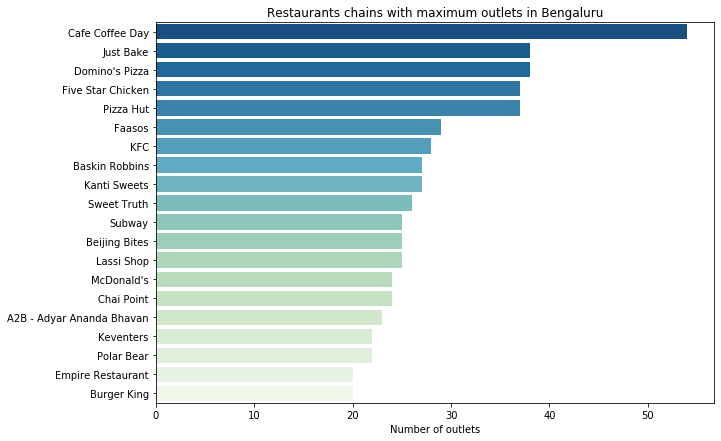

In [14]:
chains=data_b['name'].value_counts()[:20]

plt.figure(figsize=(10,7))
plt.title("Restaurants chains with maximum outlets in Bengaluru")
ax = sns.barplot(x=chains,y=chains.index,palette='GnBu_r')
plt.xlabel("Number of outlets")

Lets see how many restaurants are taking online orders

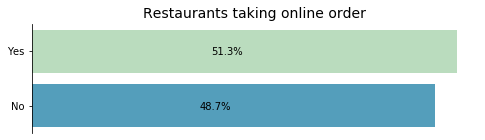

In [15]:
online_orders = data_b['online_order'].value_counts()

plt.figure(figsize=(8,2))
ax = sns.barplot(x=online_orders,y=online_orders.index,palette='GnBu')
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_ylabel('')    
ax.set_xlabel('')
plt.text((online_orders[0]-1000)/2, 0 +.0725, str(round(online_orders[0]*100/sum(online_orders),1)) +'%' , color='Black', fontsize=10)
plt.text((online_orders[1]-1000)/2, 1+.0725, str(round(online_orders[1]*100/sum(online_orders),1))+'%' , color='Black', fontsize=10)
plt.title('Restaurants taking online order',fontsize = 14)
ax.tick_params(axis = 'x',bottom = False,  labelbottom = False )


What is ratings distribution like

<Figure size 432x288 with 0 Axes>

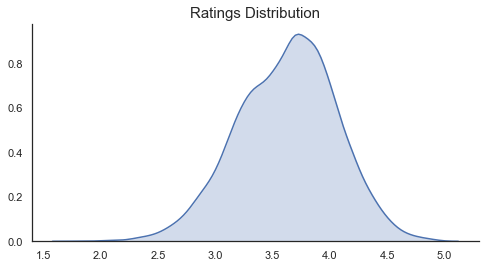

In [16]:
ratings = data_b['rate'].dropna().apply(lambda x : float(x.split('/')[0])
                                           if (len(x)>3)  else np.nan ).dropna()
sns.set(style="white")
sns.despine(offset=10, trim=True)
plt.figure(figsize=(8,4))
ax=sns.kdeplot(data=ratings,shade = True)
sns.set_style="white"
plt.title('Ratings Distribution',fontsize=15)
# ax.set_position(pos=[1,1,1,1])
ax.spines["right"].set_visible(False)
# ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
# ax.tick_params(axis = 'y',left = False,  labelleft = False )
ax.legend_.remove()


1. Average rating of restaurants in Bangalore lies between 3.5 to 4.0 on a scale of 5.0. This is a pretty good spec on a city level in my opinion.
1. Ratings above 4.5 is a rarity and so is below 2.5

Cost for Two!

<Figure size 432x288 with 0 Axes>

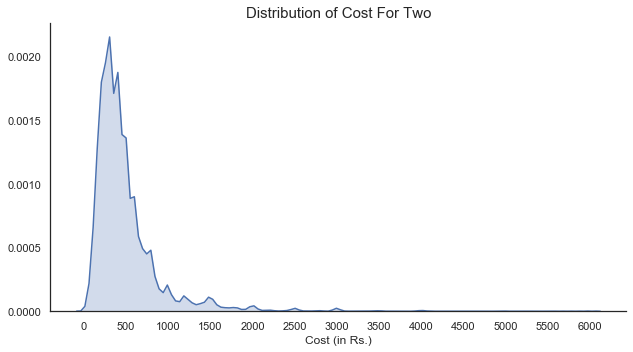

In [17]:
cost_for_two = data_b['approx_cost(for two people)'].dropna()
cost_for_two=cost_for_two.apply(lambda x: int(x.replace(',','')))

label = np.arange(0,cost_for_two.max()+500,500 ).tolist()

sns.set(style="white")
sns.despine(offset=10, trim=True)
plt.figure(figsize=(8,4))
ax=sns.kdeplot(data=cost_for_two,shade = True)

plt.title('Distribution of Cost For Two',fontsize=15)
ax.set_position(pos=[1,1,1,1])
ax.spines["right"].set_visible(False)
# ax.spines["left"].set_visible(False)
plt.xlabel('Cost (in Rs.)')
ax.spines["top"].set_visible(False)
# ax.tick_params(axis = 'y',left = False,  labelleft = False )
plt.xticks(label)
ax.legend_.remove()

1. Mean cost for two people is well under Rs.500. Good news for people who are looking to go out on dates, hang out with friends or catchup with old mates.

Restaurants providing reservation

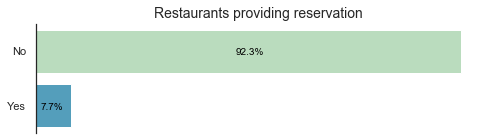

In [18]:
table_reservations = data_b['book_table'].value_counts()

plt.figure(figsize=(8,2))
ax = sns.barplot(x=table_reservations,y=table_reservations.index,palette='GnBu')

ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_ylabel('')    
ax.set_xlabel('')

plt.text((table_reservations[0]-700)/2, 0 +.0725, str(round(table_reservations[0]*100/sum(table_reservations),1)) +'%' , color='Black', fontsize=10)
plt.text((table_reservations[1]-700)/2, 1+.0725, str(round(table_reservations[1]*100/sum(table_reservations),1)) +'%', color='Black', fontsize=10)
plt.title('Restaurants providing reservation',fontsize = 14)
ax.tick_params(axis = 'x',bottom = False,  labelbottom = False )

# Coming down to preferred location

Which locatity has most eating options?

In [19]:
pref_loc_rest_count = data_b.location_merge.value_counts()[0:10]
pref_loc_rest_count1 = data_b.location_merge.value_counts()[0:10].index.tolist()

These are the top ten

[Text(0, 0.5, 'Locality'), Text(0.5, 0, 'Number of restaurants')]

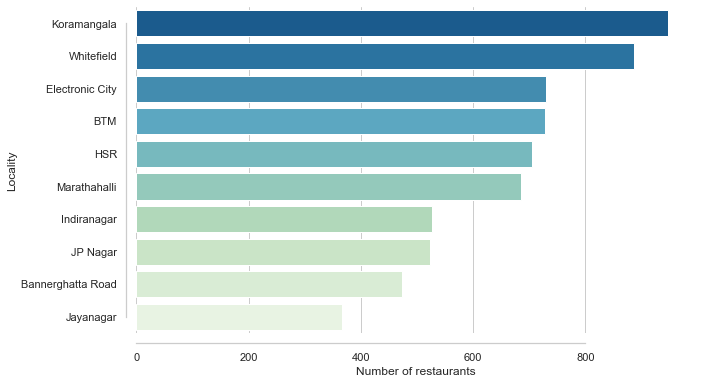

In [20]:
plt.figure(figsize=(10,6))
sns.set(style='whitegrid')
ax=sns.barplot(x=pref_loc_rest_count,y=pref_loc_rest_count.index,palette='GnBu_r')
sns.despine(offset=10, trim=True)
ax.set(xlabel = 'Number of restaurants',ylabel='Locality')

In [21]:
dat_top_ten = data_b[data_b['location_merge'].isin(pref_loc_rest_count1)]

In [22]:
dat_top_ten.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6571 entries, 26 to 12496
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          6571 non-null   object
 1   address                      6571 non-null   object
 2   name                         6571 non-null   object
 3   online_order                 6571 non-null   object
 4   book_table                   6571 non-null   object
 5   rate                         5286 non-null   object
 6   votes                        6571 non-null   int64 
 7   phone                        6412 non-null   object
 8   location                     6571 non-null   object
 9   rest_type                    6537 non-null   object
 10  dish_liked                   2530 non-null   object
 11  cuisines                     6562 non-null   object
 12  approx_cost(for two people)  6518 non-null   object
 13  reviews_list                 65

Lets find the best eating options

In [23]:
dat_1 = dat_top_ten.loc[:,['location_merge','rate','approx_cost(for two people)','online_order']].copy()
dat_1['rate'].dropna(inplace=True)
dat_1['rate']= dat_1['rate'].apply(lambda x : float(x.split('/')[0])
                                           if (len(x)>3)  else np.nan )
dat_1['approx_cost(for two people)'].dropna(inplace=True)
dat_1['approx_cost(for two people)'] = dat_1['approx_cost(for two people)'].apply(lambda x: int(x.replace(',','')))
dat_1.reset_index(inplace=True , drop=True)

In [24]:
dat_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6571 entries, 0 to 6570
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   location_merge               6571 non-null   object 
 1   rate                         4930 non-null   float64
 2   approx_cost(for two people)  6518 non-null   float64
 3   online_order                 6571 non-null   object 
dtypes: float64(2), object(2)
memory usage: 205.5+ KB


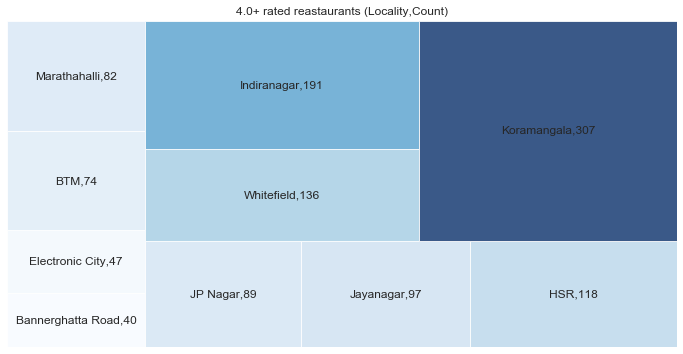

In [25]:
area_plot = pd.DataFrame(dat_1[dat_1['rate']>=4.0].
                         groupby('location_merge')['rate'].count().sort_values())

norm = mpl.colors.Normalize(vmin=min(area_plot.rate), vmax=max(area_plot.rate))
colors = [mpl.cm.Blues(norm(value)) for value in area_plot.rate]

label = [str(area_plot.index[i])+','+str(area_plot.rate[i]) for i in range(len(area_plot))]

plt.figure(figsize=(12,6))
squarify.plot(sizes=area_plot.rate, label=label,color=colors,alpha=.8)
plt.title('4.0+ rated reastaurants (Locality,Count)')
plt.axis('off')
plt.show()

In [26]:
R1 = area_plot[5:10].rank(ascending = False)

Lets have a look at the cost distribution in the 4.0+ rated restaurants in top five localities

In [27]:
top_five_no_rat = dat_top_ten.loc[(dat_top_ten['location_merge'].isin(area_plot.index[5:10].tolist())),['location_merge','approx_cost(for two people)','rate']]
top_five_no_rat['approx_cost(for two people)'].dropna(inplace=True)
top_five_no_rat['approx_cost(for two people)'] = top_five_no_rat['approx_cost(for two people)'].apply(lambda x: int(x.replace(',','')))
top_five_no_rat['rate'].dropna(inplace=True)
top_five_no_rat['rate']= top_five_no_rat['rate'].apply(lambda x : float(x.split('/')[0])
                                           if (len(x)>3)  else np.nan )
top_five_no_rat['rate_above_4']=top_five_no_rat['rate'].apply(lambda x : 'Yes' if x>=4.0 else 'No' )

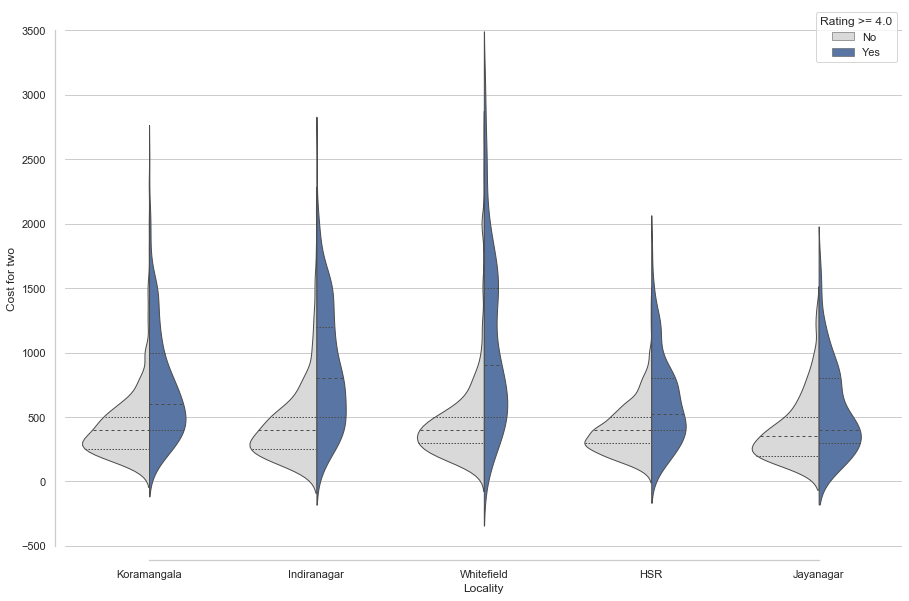

In [28]:
order = area_plot[5:10].sort_values(by = 'rate',ascending = False).index.tolist()

sns.set(style="whitegrid")
plt.figure(figsize=(15,10))

ax = sns.violinplot(x="location_merge", y="approx_cost(for two people)", hue = 'rate_above_4',
                    split=True,inner="quart", linewidth=1,palette={"Yes": "b", "No": ".85"}, 
                    data=top_five_no_rat, order=order)
sns.despine(offset=10, trim=True)
ax.set(ylabel='Cost for two', xlabel='Locality')
plt.legend(loc="best", frameon=True,title = 'Rating >= 4.0' )



In [29]:
R2 = pd.DataFrame(top_five_no_rat[top_five_no_rat['rate_above_4']=='Yes'].groupby('location_merge')['approx_cost(for two people)'].mean()).rank()

R3 is the rank for cost for two averaged over all the restaurants and not just 4.0+ rated restaurants.

In [30]:
R3 = pd.DataFrame(top_five_no_rat.groupby('location_merge')['approx_cost(for two people)'].mean()).rank()

Ratings distribution

[Text(0, 0.5, 'Rating'), Text(0.5, 0, 'Locality')]

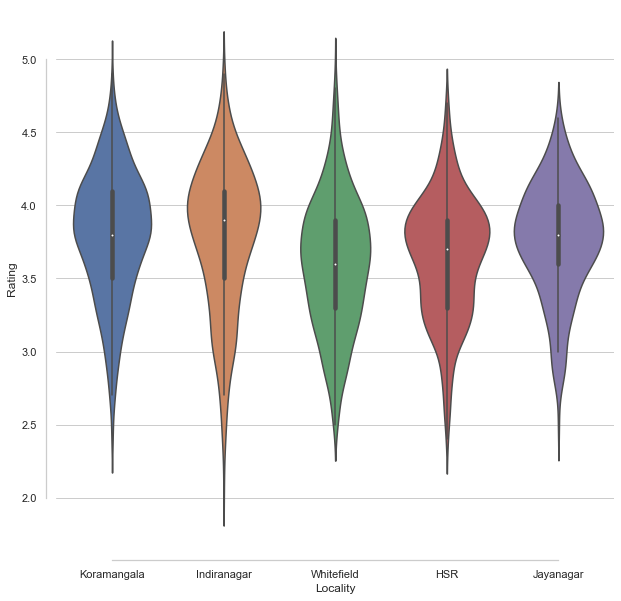

In [31]:
#retrieving ratings data for top 5
top_five_all_rat = dat_1.loc[(dat_1['location_merge'].isin(area_plot.index[5:10].tolist())),['location_merge','rate']].dropna()

#order = (top_five.groupby('location_merge')['rate'].count()).sort_values(ascending = False).index.tolist()
sns.set(style="whitegrid")
plt.figure(figsize=(10,10))

ax = sns.violinplot(x="location_merge", y="rate", data=top_five_all_rat,
                   order=order)
sns.despine(offset=10, trim=True)
ax.set(ylabel='Rating', xlabel='Locality')

In [32]:
R4 = pd.DataFrame(top_five_all_rat.groupby('location_merge')['rate'].mean()).rank(ascending=False)

In [33]:
#Collecting data for online orders 
with_all = pd.DataFrame(dat_1[(dat_1['location_merge'].isin(area_plot.index[5:10].tolist()))
                              &(dat_1['online_order']=='Yes')].groupby('location_merge')['online_order'].count().sort_values())
with_yes = pd.DataFrame(dat_1[(dat_1['location_merge'].isin(area_plot.index[5:10].tolist()))
                              &(dat_1['online_order']=='Yes')&(dat_1['rate']>=4.0)].groupby('location_merge')['online_order'].count().sort_values())
fin = with_yes.join(with_all, lsuffix='_l', rsuffix='_r')

[Text(0, 0.5, 'Locality'), Text(0.5, 0, 'Restaurants accepting online orders')]

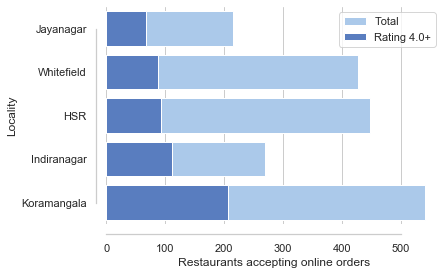

In [34]:
sns.set_color_codes("pastel")
ax = sns.barplot(x='online_order_r', y=fin.index, data=fin,
            label="Total", color="b")

# Plot where rating is 4.0+
sns.set_color_codes("muted")
ax = sns.barplot(x='online_order_l', y=fin.index, data=fin,
            label="Rating 4.0+", color="b")


# Add a legend and informative axis label
sns.despine(offset=10, trim=True)
plt.legend(loc="best", frameon=True)
# plt.xlabel("Restaurants accepting online orders")
ax.set(xlabel='Restaurants accepting online orders', ylabel='Locality')

In [35]:
R5 = fin[['online_order_l']].rank(ascending = False)

What about the variety of cuisines?

In [36]:
#getting the cuisine data
cuisines = dat_top_ten.loc[(dat_top_ten['location_merge'].isin(area_plot.index[5:10].tolist())),['location_merge','cuisines']].dropna()

#adding ',' and then grouping cuisines by locality
cuisines['cuisines'] = cuisines['cuisines']+','
cuis_list = pd.DataFrame(cuisines.groupby('location_merge')['cuisines'].sum()).copy()

#Lets do some manipulations so the we are able to count the variety of cuisines
cuis_list['list'] = '0'
cuis_list['list_uni'] = '0'

for i in range(len(cuis_list)):
    temp=cuis_list['cuisines'][i].split(',')
    temp.remove('')
    t = [i.strip().lower() for i in temp ]
#     t.remove('')
    temp=list()
#     print(temp)
    cuis_list['list'][i] = t
    cuis_list['list_uni'][i] = set(t)
    t=list()
#     print(t)

#Finally counting
cuis_list['uni_count']=cuis_list['list_uni'].str.len()

In [37]:
cuis_list

,cuisines,list,list_uni,uni_count
location_merge,,,,
HSR,"North Indian,Healthy Food, Cafe, Beverages,Ita...","[north indian, healthy food, cafe, beverages, ...","{hyderabadi, mithai, asian, japanese, salad, c...",62
Indiranagar,"Cafe,North Indian, Mughlai, Fast Food,North In...","[cafe, north indian, mughlai, fast food, north...","{mithai, hyderabadi, asian, japanese, steak, c...",71
Jayanagar,"Cafe, Fast Food,Desserts,Fast Food,Turkish, Ro...","[cafe, fast food, desserts, fast food, turkish...","{mithai, asian, chinese, kerala, turkish, mexi...",49
Koramangala,"Mexican, Italian,North Indian, Biryani, Fast F...","[mexican, italian, north indian, biryani, fast...","{hyderabadi, asian, japanese, steak, parsi, tu...",79
Whitefield,"Bakery, Desserts, Cafe, Italian, Pizza,North I...","[bakery, desserts, cafe, italian, pizza, north...","{mithai, hyderabadi, asian, japanese, steak, c...",68


In [38]:
dict(Counter(cuis_list['list'][0]))

{'north indian': 289,
 'healthy food': 11,
 'cafe': 40,
 'beverages': 76,
 'italian': 34,
 'pizza': 25,
 'biryani': 110,
 'andhra': 30,
 'chinese': 182,
 'fast food': 128,
 'awadhi': 2,
 'mughlai': 23,
 'south indian': 113,
 'street food': 53,
 'bakery': 39,
 'juices': 19,
 'sandwich': 22,
 'pan asian': 1,
 'continental': 63,
 'hyderabadi': 6,
 'charcoal chicken': 7,
 'desserts': 76,
 'mangalorean': 2,
 'ice cream': 30,
 'lucknowi': 1,
 'salad': 14,
 'burger': 28,
 'rolls': 24,
 'belgian': 1,
 'kebab': 12,
 'bengali': 9,
 'thai': 11,
 'turkish': 4,
 'paan': 1,
 'mithai': 19,
 'coffee': 4,
 'tea': 7,
 'seafood': 20,
 'kerala': 22,
 'american': 10,
 'steak': 4,
 'momos': 13,
 'chettinad': 3,
 'european': 2,
 'arabian': 14,
 'rajasthani': 3,
 'mexican': 3,
 'tibetan': 2,
 'gujarati': 1,
 'asian': 14,
 'finger food': 7,
 'modern indian': 2,
 'bbq': 10,
 'mediterranean': 5,
 'lebanese': 2,
 'maharashtrian': 1,
 'oriya': 2,
 'middle eastern': 3,
 'japanese': 2,
 'korean': 1,
 'bihari': 1,
 '

In [39]:
R6 = cuis_list[['uni_count']].rank(ascending = False)

What about the Type of restaurant?

In [40]:
#retrieving data for restaurant type
rest_type = dat_top_ten.loc[(dat_top_ten['location_merge'].isin(area_plot.index[5:10].tolist())),['location_merge','rest_type']].dropna()

#adding ',' and then grouping rest_type by locality
rest_type['rest_type'] = rest_type['rest_type']+','
rest_list = pd.DataFrame(rest_type.groupby('location_merge')['rest_type'].sum()).copy()

#Lets do some manipulations so the we are able to count the variety of cuisines
rest_list['list'] = '0'
rest_list['list_uni'] = '0'

for i in range(len(rest_list)):
    temp=rest_list['rest_type'][i].split(',')
    temp.remove('')
    t = [i.strip().lower() for i in temp ]
#     t.remove('')
    temp=list()
#     print(temp)
    rest_list['list'][i] = t
    rest_list['list_uni'][i] = set(t)
    t=list()
#     print(t)

rest_list['uni_count']=rest_list['list_uni'].str.len()

In [41]:
rest_list

,rest_type,list,list_uni,uni_count
location_merge,,,,
HSR,"Delivery,Casual Dining, Cafe,Delivery,Delivery...","[delivery, casual dining, cafe, delivery, deli...","{kiosk, mess, delivery, cafe, pub, bar, bakery...",16
Indiranagar,"Cafe,Takeaway, Delivery,Delivery,Delivery,Beve...","[cafe, takeaway, delivery, delivery, delivery,...","{kiosk, mess, delivery, cafe, pub, bar, bakery...",16
Jayanagar,"Cafe,Dessert Parlor,Quick Bites,Kiosk,Beverage...","[cafe, dessert parlor, quick bites, kiosk, bev...","{kiosk, delivery, cafe, pub, bar, bakery, beve...",15
Koramangala,"Delivery,Delivery,Delivery,Bakery,Beverage Sho...","[delivery, delivery, delivery, bakery, beverag...","{kiosk, mess, delivery, cafe, dhaba, pub, bar,...",18
Whitefield,"Bakery, Cafe,Delivery,Delivery,Delivery,Bevera...","[bakery, cafe, delivery, delivery, delivery, b...","{microbrewery, kiosk, dhaba, pop up, takeaway,...",20


In [42]:
R7 = rest_list[['uni_count']].rank(ascending = False)

Lets try an visualize that

In [43]:
#Sorting for no particulat reason
rest_list_order=rest_list.sort_values(by='uni_count',ascending = False)

#Making dataframe from list of restaurant type (from list to dict with counts to series to dataframe)
df_type = pd.DataFrame()
for i in range(len(rest_list_order)):
    df_type = df_type.join(pd.Series(dict(Counter(rest_list_order['list'][i]))).to_frame(rest_list_order.index[i]),how='outer')

df_type.replace(np.nan,0,inplace=True)
df_type.astype('float')
df_type.reset_index(inplace=True)

#First time melting dataframe. Feels hot.
df_melted = pd.melt(df_type, id_vars=['index'], value_vars=['Whitefield','Koramangala','HSR','Indiranagar','Jayanagar'])

Text(0.5, 1.0, 'Restaurant Types in different localities')

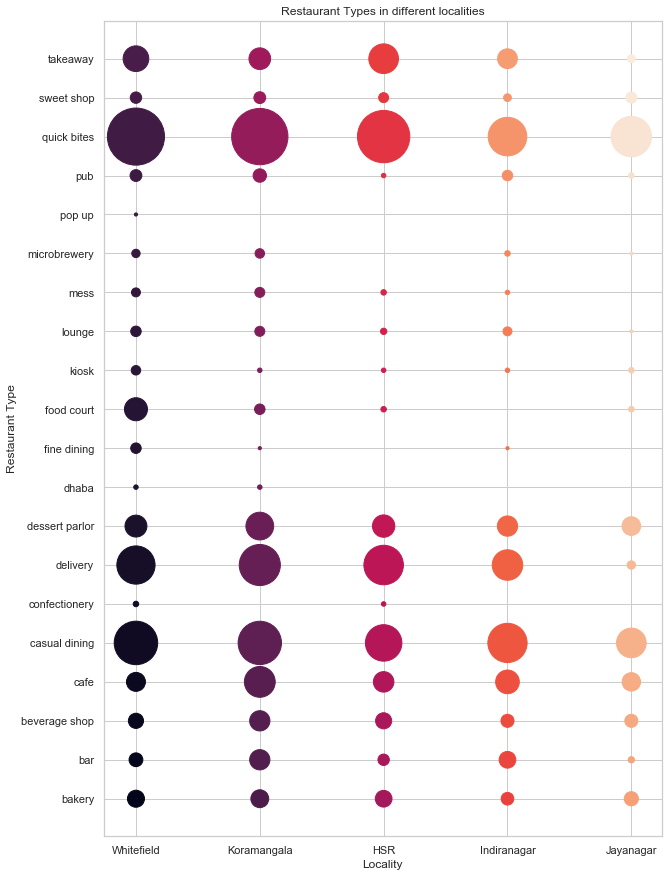

In [44]:
plt.figure(figsize=(10,15))
sns.set(style="whitegrid")
sns.despine(offset=10, trim=True)
plt.scatter(y='index',x='variable',data=df_melted,s = df_melted.value*10 , c = range(len(df_melted['variable'])))
plt.xlabel('Locality')
plt.ylabel('Restaurant Type')
plt.title('Restaurant Types in different localities')

In [93]:
#concatenating dataframes
data_frame = [R1,R2,R3,R4,R5,R6,R7]
RANK = pd.concat(data_frame, join='outer', axis=1)
RANK.columns = ['R1','R2','R3',"R4",'R5','R6','R7']

#And the winner is
winner_is = RANK.sum(axis = 1).rank().sort_values()

In [94]:
winner_is

Koramangala    1.0
Indiranagar    2.0
HSR            3.0
Whitefield     4.0
Jayanagar      5.0
dtype: float64

Lets explore the top 2 localities.

**KORAMANGALA**

In [47]:
dat_kor = dat_top_ten.loc[dat_top_ten['location_merge']=='Koramangala',:].copy()
dat_kor['rate'].dropna(inplace=True)
dat_kor['rate']= dat_kor['rate'].apply(lambda x : float(x.split('/')[0])
                                           if (len(x)>3)  else np.nan )
dat_kor['approx_cost(for two people)'].dropna(inplace=True)
dat_kor['approx_cost(for two people)'] = dat_kor['approx_cost(for two people)'].apply(lambda x: int(x.replace(',','')))
dat_kor.reset_index(inplace=True , drop=True)

In [48]:
dat_kor_4 = dat_kor[dat_kor['rate']>=4.0]

In [49]:
ban_loc = pd.read_csv('ban_loc.csv',index_col = 0)
ban_loc.drop(ban_loc[ban_loc['name'].isin(['Desipun','Sulemani Chichas'])].index, inplace = True)
ban_loc_merge=dat_kor_4.merge(ban_loc, left_on=['name','location'],right_on=['name','area'], how='inner').loc[:,['name','location_merge','longitude','latitude']]

Lets get the locations in Koramangala

In [50]:
#lat-lng Koramangala
lat = 12.9352
lng = 77.6245

# #lat-lng Indiranagar
# lat_i = 12.9732913
# lng_i = 77.6404672

# #lat-lng HSR
# lat_h = 12.9116225 
# lng_h = 77.6388622


#Foursquare data
#put your credentials here
LIMIT = 100
CLIENT_ID = 'UB0QPODEO0RKO2ND4DI0XKI3BUGIXQ5KCP1ZOVYHJNZMWPKJ' # your Foursquare ID 
CLIENT_SECRET = 'YRTCMOYHCDC4AIDIZI55YZKLTJ1YK21ZJA4Q1GPYVKX4KEIM' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
radius = 1500

#category Ids from Foursquare website
books_stat = ['4bf58dd8d48988d114951735','52f2ab2ebcbc57f1066b8b30','52f2ab2ebcbc57f1066b8b21']
library = ['4bf58dd8d48988d12f941735']
grocery = ['4bf58dd8d48988d118951735', '52f2ab2ebcbc57f1066b8b45']
pharmacy = ['4bf58dd8d48988d10f951735']
hospital = ['4bf58dd8d48988d196941735']
gym = ['4bf58dd8d48988d175941735']
mall_theatre = ['5744ccdfe4b0c0459246b4df','4bf58dd8d48988d1fd941735','4bf58dd8d48988d17f941735']

q_n = [books_stat,library,grocery,pharmacy,hospital,gym,mall_theatre]

venues_dict={}

for d,i in enumerate(q_n):
    venues_list = []
    for cat in i: 
        url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION, 
                lat, 
                lng, 
                radius, 
                LIMIT,
                cat)

        results = requests.get(url).json()["response"]['venues']

        venues_list.append([(lat, 
        lng, 
        v['name'], 
        v['location']['lat'], 
        v['location']['lng'],  
        v['categories'][0]['name']) for v in results])
        
        print(cat)

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood Latitude', 
              'Neighborhood Longitude', 
              'Venue', 
              'Venue Latitude', 
              'Venue Longitude', 
              'Venue Category']
    
    nearby_venues['Venue_Category_Code'] = d
    
    venues_dict[d]= nearby_venues

4bf58dd8d48988d114951735
52f2ab2ebcbc57f1066b8b30
52f2ab2ebcbc57f1066b8b21
4bf58dd8d48988d12f941735
4bf58dd8d48988d118951735
52f2ab2ebcbc57f1066b8b45
4bf58dd8d48988d10f951735
4bf58dd8d48988d196941735
4bf58dd8d48988d175941735
5744ccdfe4b0c0459246b4df
4bf58dd8d48988d1fd941735
4bf58dd8d48988d17f941735


Plot for all the restaurants and amenities around them.

In [51]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [52]:
lat = 12.9352
lng = 77.6245

k = len(venues_dict)
x1 = np.arange(k)
ys1 = [i + x1 + (i*x1)**2 for i in range(k)]
colors_array1 = cm.rainbow(np.linspace(0, 1, len(ys1)))
rainbow1 = [colors.rgb2hex(i) for i in colors_array1]

kor_map = folium.Map(location=[lat,lng], zoom_start=15)
#folium.Circle([lat,lng], radius=1500, color='white', fill=True, fill_opacity=0.6).add_to(kor_map)

incidents = plugins.MarkerCluster().add_to(kor_map)

### FOr nearby amenities
for k in range(len(venues_dict)):
    df = venues_dict[k]
    c = rainbow1[k]
    for l1,l2,i,j in zip(df['Venue Latitude'],df['Venue Longitude'],df['Venue'],df['Venue Category']):
        folium.CircleMarker(
                [l1,l2],
                radius=5,
                popup=(i,j),
                color=c,
                fill=True,
                fill_color=c,
                fill_opacity=0.7
                ).add_to(kor_map) 

        
#for restaurants 
# for i,l1,l2 in zip(ban_loc_merge.index,ban_loc_merge['latitude'],ban_loc_merge['longitude']):
#     folium.CircleMarker(
#             [l1, l2],
#             popup=(ban_loc_merge['name'][i],[l1, l2]),
#             radius=5,
#             color='pink',
#             fill=True,
#             fill_color='pink',
#             fill_opacity=1
#             ).add_to(kor_map) 


###For markers
for i,l1,l2 in zip(ban_loc_merge.index,ban_loc_merge['latitude'],ban_loc_merge['longitude']):
    folium.Marker([l1, l2], popup=(ban_loc_merge['name'][i],[l1, l2])).add_to(incidents) 

kor_map

# Clustering 

- How to cluster was a difficult problem for me to solve with my rudimentary knowledge of clustering algorithms. 
    - K-means clusterting to form clusters based on minimum distance, find the centre of the clusters and then find those zones which encorporate all(or maximum) the amenities.Caveat with this technique is highlighted in this discussion: https://datascience.stackexchange.com/questions/761/clustering-geo-location-coordinates-lat-long-pairs
    - DBSCAN (Hierarchical clustering)
    - Agglomerative clustering (Hierarchical clustering)
        

Data preparation

In [53]:
#merging venues data and restaurants data
venues_one = pd.concat(venues_dict,ignore_index = True)
venues_req = venues_one.loc[:,['Venue','Venue Latitude','Venue Longitude','Venue_Category_Code']]
ban_loc_req = ban_loc_merge.loc[:,['name','latitude','longitude']]

#Giving restaurants a category code
ban_loc_req['cat_code'] = -1
ban_loc_req.columns = venues_req.columns

all_venue_req = pd.concat([ban_loc_req,venues_req],ignore_index = True)

# converting lat-lng to numpy array
coords= np.array(all_venue_req[['Venue Latitude','Venue Longitude']])

**KMeans**

KMeans parameters: <br>
    - n_clusters and n_init were heuristically selected.

In [54]:
#defining and fitting model
K_m = KMeans(n_clusters=14,n_init=10)
model = K_m.fit(coords)

In [55]:
#cluster labels in a dataframe
all_venue_req['cluster_kmeans'] = model.labels_

In [56]:
centre=model.cluster_centers_

Map 1 showing our clusters

In [57]:
lat = 12.9352
lng = 77.6245

k = len(all_venue_req.cluster_kmeans.unique())
x1 = np.arange(k)
ys1 = [i + x1 + (i*x1)**2 for i in range(k)]
colors_array1 = cm.rainbow(np.linspace(0, 1, len(ys1)))
rainbow1 = [colors.rgb2hex(i) for i in colors_array1]

kor_map = folium.Map(location=[lat,lng], zoom_start=15)
#folium.Circle([lat,lng], radius=1500, color='white', fill=True, fill_opacity=0.6).add_to(kor_map)

# incidents = plugins.MarkerCluster().add_to(kor_map)
for lat, lon in centre:
    folium.Circle([lat, lon], radius=300, color='green', fill=True, fill_opacity=0.25).add_to(kor_map)

### For nearby amenities
for l1,l2,i,j in zip(all_venue_req['Venue Latitude'],all_venue_req['Venue Longitude'],all_venue_req['Venue'],
                     all_venue_req['cluster_kmeans']):
    folium.CircleMarker(
            [l1,l2],
            radius=5,
            popup=(i,j),
            color=rainbow1[j],
            fill=True,
            fill_color=rainbow1[j],
            fill_opacity=0.7
            ).add_to(kor_map) 

# #for restaurants 
# for i,l1,l2 in zip(ban_loc_merge.index,ban_loc_merge['latitude'],ban_loc_merge['longitude']):
#     folium.CircleMarker(
#             [l1, l2],
#             popup=(ban_loc_merge['name'][i],[l1, l2]),
#             radius=5,
#             color='pink',
#             fill=True,
#             fill_color='pink',
#             fill_opacity=1
#             ).add_to(kor_map) 


# ###For markers
# # for i,l1,l2 in zip(ban_loc_merge.index,ban_loc_merge['latitude'],ban_loc_merge['longitude']):
# #     folium.Marker([l1, l2], popup=(ban_loc_merge['name'][i],[l1, l2])).add_to(incidents) 

kor_map

Map 2 showing categories in each cluster

In [58]:
lat = 12.9352
lng = 77.6245

k = len(venues_dict)
x1 = np.arange(k)
ys1 = [i + x1 + (i*x1)**2 for i in range(k)]
colors_array1 = cm.rainbow(np.linspace(0, 1, len(ys1)))
rainbow1 = [colors.rgb2hex(i) for i in colors_array1]

kor_map = folium.Map(location=[lat,lng], zoom_start=15)
#folium.Circle([lat,lng], radius=1500, color='white', fill=True, fill_opacity=0.6).add_to(kor_map)

# incidents = plugins.MarkerCluster().add_to(kor_map)
for lat, lon in centre:
    folium.Circle([lat, lon], radius=300, color='green', fill=True, fill_opacity=0.0).add_to(kor_map)
### FOr nearby amenities
for k in range(len(venues_dict)):
    df = venues_dict[k]
    c = rainbow1[k]
    for l1,l2,i,j in zip(df['Venue Latitude'],df['Venue Longitude'],df['Venue'],df['Venue Category']):
        folium.CircleMarker(
                [l1,l2],
                radius=5,
                popup=(i,j),
                color=c,
                fill=True,
                fill_color=c,
                fill_opacity=0.7
                ).add_to(kor_map) 

        
#for restaurants 
for i,l1,l2 in zip(ban_loc_merge.index,ban_loc_merge['latitude'],ban_loc_merge['longitude']):
    folium.CircleMarker(
            [l1, l2],
            popup=(ban_loc_merge['name'][i],[l1, l2]),
            radius=5,
            color='pink',
            fill=True,
            fill_color='black',
            fill_opacity=.9
            ).add_to(kor_map) 




###For markers
# for i,l1,l2 in zip(ban_loc_merge.index,ban_loc_merge['latitude'],ban_loc_merge['longitude']):
#     folium.Marker([l1, l2], popup=(ban_loc_merge['name'][i],[l1, l2])).add_to(incidents) 

kor_map

K means caveats:<br>
    - scikit-learn has no option in KMeans algorithm to change distance function and we are stuck with Euclidean distance, which is not ideal for geospatial data. (It might work for this case becasue the datapoints are not widespread over a larger area)
    - k-means is designed to minimize variance. This is, of course, appearling from a statistical and signal processing point of view, but our data is not "linear".
    - "The problems of k-means are easy to see when you consider points close to the +-180 degrees wrap-around. Even if you hacked k-means to use Haversine distance, in the update step when it recomputes the mean the result will be badly screwed. Worst case is, k-means will never converge!"
    - EDIT : One way is to convert the data in Euclidean plane's coordinates and then convert them back to lat-long.

**DBSCAN**

DBSCAN parameters:<br>
    - eps is set to .25 km (converted to radians) and metric = 'haversine' which takes radians as input.
    - min sample = 1 so that every location is part of a cluster.
    - algorithm = 'brute', because my dataset is very small.  

In [59]:
from sklearn.cluster import DBSCAN
# from geopy.distance import great_circle


In [60]:
kms_per_radian = 6371.0088
epsilon = .25 / kms_per_radian
db = DBSCAN(eps=epsilon, min_samples=1, algorithm='brute', metric='haversine').fit(np.radians(coords))
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))
clusters = pd.Series([coords[cluster_labels == n] for n in range(num_clusters)])
print('Number of clusters: {}'.format(num_clusters))

Number of clusters: 14


In [61]:
# import sklearn.neighbors as check
# check.VALID_METRICS['ball_tree']

In [62]:
all_venue_req['cluster_dbscan'] = cluster_labels

In [63]:
lat = 12.9352
lng = 77.6245

k = len(all_venue_req.cluster_dbscan.unique())
x1 = np.arange(k)
ys1 = [i + x1 + (i*x1)**2 for i in range(k)]
colors_array1 = cm.rainbow(np.linspace(0, 1, len(ys1)))
rainbow1 = [colors.rgb2hex(i) for i in colors_array1]

kor_map = folium.Map(location=[lat,lng], zoom_start=14)

### FOr nearby amenities
for l1,l2,i,j in zip(all_venue_req['Venue Latitude'],all_venue_req['Venue Longitude'],all_venue_req['Venue'],
                     all_venue_req['cluster_dbscan']):
    folium.CircleMarker(
            [l1,l2],
            radius=5,
            popup=(i,j),
            color=rainbow1[j],
            fill=True,
            fill_color=rainbow1[j],
            fill_opacity=0.7
            ).add_to(kor_map)

kor_map

Looks like DBSCAN wont work for the kind of clustering I want.
    - DBSCAN makes all the nearby points in one cluster, not what I was looking for.  

**Agglomerative**

In [64]:
#distance matrix
from sklearn.metrics.pairwise import haversine_distances

rad = np.radians(coords)
result = np.zeros(shape=(len(coords),len(coords)))

for i in range(len(coords)):
    for j in range(len(coords)):
        k = haversine_distances([rad[i],rad[j]])
        result[i][j]=k[0][1]*6371.0088

I use the following parameters for agglomerative clustering :<br>
    - distance_threshold =1 along with linkage = 'complete', Reasoning: I dont want any two points in the cluster to be more than 1 km apart.
    - n_clusters = None, because I have already mentioned distance threshold as a condition for my clusters.
    - affinity = 'precomputed', as I used a precomputed distance matrix. Unlike DBSCAN I could not use 'haversine' as an     inbuilt distance metric in Agglomerative clustering.

In [65]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(distance_threshold=1,n_clusters=None ,affinity = 'precomputed',linkage='complete')
model = clustering.fit(result)
all_venue_req['cluster_agg'] = model.labels_

In [66]:
np.unique(model.labels_)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [67]:
lat = 12.9352
lng = 77.6245

k = len(all_venue_req.cluster_agg.unique())
x1 = np.arange(k)
ys1 = [i + x1 + (i*x1)**2 for i in range(k)]
colors_array1 = cm.rainbow(np.linspace(0, 1, len(ys1)))
rainbow1 = [colors.rgb2hex(i) for i in colors_array1]

kor_map = folium.Map(location=[lat,lng], zoom_start=15)
#folium.Circle([lat,lng], radius=1500, color='white', fill=True, fill_opacity=0.6).add_to(kor_map)

## incidents = plugins.MarkerCluster().add_to(kor_map)
# for lat, lon in centre:
#     folium.Circle([lat, lon], radius=300, color='green', fill=True, fill_opacity=0.25).add_to(kor_map)

### FOr nearby amenities
for l1,l2,i,j in zip(all_venue_req['Venue Latitude'],all_venue_req['Venue Longitude'],all_venue_req['Venue'],
                     all_venue_req['cluster_agg']):
    folium.CircleMarker(
            [l1,l2],
            radius=5,
            popup=(i,j),
            color=rainbow1[j],
            fill=True,
            fill_color=rainbow1[j],
            fill_opacity=0.7
            ).add_to(kor_map) 


# #for restaurants 
# for i,l1,l2 in zip(ban_loc_merge.index,ban_loc_merge['latitude'],ban_loc_merge['longitude']):
#     folium.CircleMarker(
#             [l1, l2],
#             popup=(ban_loc_merge['name'][i],[l1, l2]),
#             radius=5,
#             color='pink',
#             fill=True,
#             fill_color='pink',
#             fill_opacity=1
#             ).add_to(kor_map) 


# ###For markers
# # for i,l1,l2 in zip(ban_loc_merge.index,ban_loc_merge['latitude'],ban_loc_merge['longitude']):
# #     folium.Marker([l1, l2], popup=(ban_loc_merge['name'][i],[l1, l2])).add_to(incidents) 

kor_map

find reasons why agglomerative fits your requirement of clustering 

In [68]:
all_venue_req

,Venue,Venue Latitude,Venue Longitude,Venue_Category_Code,cluster_kmeans,cluster_dbscan,cluster_agg
0,Faasos,12.924990,77.637334,-1,5,0,5
1,Sweet Truth,12.924990,77.637334,-1,5,0,5
2,BOX8- Desi Meals,12.933428,77.615505,-1,2,1,2
3,YORK St.,12.935273,77.615845,-1,2,1,2
4,YORK St.,12.935273,77.615845,-1,2,1,2
...,...,...,...,...,...,...,...
420,gopalan arcade,12.931412,77.609314,6,4,1,7
421,Ustad hotel @ PVR Audi 6,12.934055,77.610648,6,4,1,7
422,OCT Audi 5,12.934892,77.613485,6,11,1,7
423,PVR Cinemas,12.934389,77.611184,6,4,1,7


In [69]:
#finding the clusters with maximum variety of venues (using agglomerative cluster)
data_dict = {}
max_venues = []

for i in range(len(np.unique(all_venue_req['cluster_agg']))):
    data = all_venue_req[all_venue_req['cluster_agg']==i]
    data_dict[i] = data.Venue_Category_Code.value_counts().to_frame()
    max_venues.append(len(data_dict[i].index))
    
# N will give the cluster id that has maximum types of venues
N = []

for i in range(len(max_venues)):

    if max_venues[i] in [max(max_venues)]:
        N.append(i)

print(N)

[2, 9]


In [70]:
#finding the clusters with maximum variety of venuesusing KMeans cluster)
data_dict = {}
max_venues = []

for i in range(len(np.unique(all_venue_req['cluster_kmeans']))):
    data = all_venue_req[all_venue_req['cluster_kmeans']==i]
    data_dict[i] = data.Venue_Category_Code.value_counts().to_frame()
    max_venues.append(len(data_dict[i].index))
    
# N will give the cluster id that has maximum types of venues
N = []

for i in range(len(max_venues)):

    if max_venues[i] in [max(max_venues)]:
        N.append(i)

print(N)

[6]


Promising localities to live in Koramangala are : <br> 
 -    **5th Block, Koramangala** (both KMeans and Agglo.) <br>
 -   **7th Block, Koramangala** (Agglo.)

**INDIRANAGAR**

In [71]:
#getting Indiranagar Restaurants
dat_ind = dat_top_ten.loc[dat_top_ten['location_merge']=='Indiranagar',:].copy()
dat_ind['rate'].dropna(inplace=True)
dat_ind['rate']= dat_ind['rate'].apply(lambda x : float(x.split('/')[0])
                                           if (len(x)>3)  else np.nan )
dat_ind['approx_cost(for two people)'].dropna(inplace=True)
dat_ind['approx_cost(for two people)'] = dat_ind['approx_cost(for two people)'].apply(lambda x: int(x.replace(',','')))
dat_ind.reset_index(inplace=True , drop=True)

#4.0+ rated restaurants
dat_ind_4 = dat_ind[dat_ind['rate']>=4.0]

#getting lat lng for the restaurants
ind_loc_merge=dat_ind_4.merge(ban_loc, left_on=['name','location'],right_on=['name','area'], how='inner').loc[:,['name','location_merge','longitude','latitude']]

In [72]:
#Getting Indiranagar Venues

#lat-lng Koramangala
# lat = 12.9352
# lng = 77.6245

# #lat-lng Indiranagar
lat = 12.9732913
lng = 77.6404672

# #lat-lng HSR
# lat_h = 12.9116225 
# lng_h = 77.6388622


#Foursquare data
#put your credentials here
LIMIT = 100
CLIENT_ID = 'UB0QPODEO0RKO2ND4DI0XKI3BUGIXQ5KCP1ZOVYHJNZMWPKJ' # your Foursquare ID 
CLIENT_SECRET = 'YRTCMOYHCDC4AIDIZI55YZKLTJ1YK21ZJA4Q1GPYVKX4KEIM' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
radius = 1500

#category Ids from Foursquare website
books_stat = ['4bf58dd8d48988d114951735' ,'52f2ab2ebcbc57f1066b8b30','52f2ab2ebcbc57f1066b8b21']
library = ['4bf58dd8d48988d12f941735']
grocery = ['4bf58dd8d48988d118951735', '52f2ab2ebcbc57f1066b8b45']
pharmacy = ['4bf58dd8d48988d10f951735']
hospital = ['4bf58dd8d48988d196941735']
gym = ['4bf58dd8d48988d175941735']
mall_theatre = ['5744ccdfe4b0c0459246b4df','4bf58dd8d48988d1fd941735','4bf58dd8d48988d17f941735']

q_n = [books_stat,library,grocery,pharmacy,hospital,gym,mall_theatre]

venues_dict_i={}

for d,i in enumerate(q_n):
    venues_list = []
    for cat in i: 
        url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION, 
                lat, 
                lng, 
                radius, 
                LIMIT,
                cat)

        results = requests.get(url).json()["response"]['venues']

        venues_list.append([(lat, 
        lng, 
        v['name'], 
        v['location']['lat'], 
        v['location']['lng'],  
        v['categories'][0]['name']) for v in results])
        
        print(cat)

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood Latitude', 
              'Neighborhood Longitude', 
              'Venue', 
              'Venue Latitude', 
              'Venue Longitude', 
              'Venue Category']
    
    nearby_venues['Venue_Category_Code'] = d
    
    venues_dict_i[d]= nearby_venues

4bf58dd8d48988d114951735
52f2ab2ebcbc57f1066b8b30
52f2ab2ebcbc57f1066b8b21
4bf58dd8d48988d12f941735
4bf58dd8d48988d118951735
52f2ab2ebcbc57f1066b8b45
4bf58dd8d48988d10f951735
4bf58dd8d48988d196941735
4bf58dd8d48988d175941735
5744ccdfe4b0c0459246b4df
4bf58dd8d48988d1fd941735
4bf58dd8d48988d17f941735


Plotting Indiranagar venues on a map

In [73]:
# lat = 12.9352
# lng = 77.6245

lat = 12.9732913
lng = 77.6404672

k = len(venues_dict_i)
x1 = np.arange(k)
ys1 = [i + x1 + (i*x1)**2 for i in range(k)]
colors_array1 = cm.rainbow(np.linspace(0, 1, len(ys1)))
rainbow1 = [colors.rgb2hex(i) for i in colors_array1]

ind_map = folium.Map(location=[lat,lng], zoom_start=15)
#folium.Circle([lat,lng], radius=1500, color='white', fill=True, fill_opacity=0.6).add_to(kor_map)

incidents = plugins.MarkerCluster().add_to(ind_map)

### FOr nearby amenities
for k in range(len(venues_dict_i)):
    df = venues_dict_i[k]
    c = rainbow1[k]
    for l1,l2,i,j in zip(df['Venue Latitude'],df['Venue Longitude'],df['Venue'],df['Venue Category']):
        folium.CircleMarker(
                [l1,l2],
                radius=5,
                popup=(i,j),
                color=c,
                fill=True,
                fill_color=c,
                fill_opacity=0.7
                ).add_to(ind_map) 

        
#for restaurants 
# for i,l1,l2 in zip(ban_loc_merge.index,ban_loc_merge['latitude'],ban_loc_merge['longitude']):
#     folium.CircleMarker(
#             [l1, l2],
#             popup=(ban_loc_merge['name'][i],[l1, l2]),
#             radius=5,
#             color='pink',
#             fill=True,
#             fill_color='pink',
#             fill_opacity=1
#             ).add_to(ind_map) 


###For markers
for i,l1,l2 in zip(ind_loc_merge.index,ind_loc_merge['latitude'],ind_loc_merge['longitude']):
    folium.Marker([l1, l2], popup=(ind_loc_merge['name'][i],[l1, l2])).add_to(incidents) 

ind_map

In [74]:
#merging venues data and restaurants data
venues_one_i = pd.concat(venues_dict_i,ignore_index = True)
venues_req_i = venues_one_i.loc[:,['Venue','Venue Latitude','Venue Longitude','Venue_Category_Code']]
ind_loc_req = ind_loc_merge.loc[:,['name','latitude','longitude']]

#Giving restaurants a category code
ind_loc_req['cat_code'] = -1
ind_loc_req.columns = venues_req_i.columns

all_venue_req_i = pd.concat([ind_loc_req,venues_req_i],ignore_index = True)

# converting lat-lng to numpy array
coords_i= np.array(all_venue_req_i[['Venue Latitude','Venue Longitude']])

**Agglomerative Clustering**

In [75]:
#distance matrix

rad_i = np.radians(coords_i)
result_i = np.zeros(shape=(len(coords_i),len(coords_i)))

for i in range(len(coords_i)):
    for j in range(len(coords_i)):
        k = haversine_distances([rad_i[i],rad_i[j]])
        result_i[i][j]=k[0][1]*6371.0088

In [76]:
from sklearn.cluster import AgglomerativeClustering
clustering_i = AgglomerativeClustering(distance_threshold=1,n_clusters=None ,affinity = 'precomputed',linkage='complete')
model_i = clustering_i.fit(result_i)
all_venue_req_i['cluster_agg'] = model_i.labels_

In [77]:
model_i.n_clusters_

13

In [78]:
lat = 12.9732913
lng = 77.6404672

k = len(all_venue_req_i.cluster_agg.unique())
x1 = np.arange(k)
ys1 = [i + x1 + (i*x1)**2 for i in range(k)]
colors_array1 = cm.rainbow(np.linspace(0, 1, len(ys1)))
rainbow1 = [colors.rgb2hex(i) for i in colors_array1]

ind_map = folium.Map(location=[lat,lng], zoom_start=15)
#folium.Circle([lat,lng], radius=1500, color='white', fill=True, fill_opacity=0.6).add_to(kor_map)

## incidents = plugins.MarkerCluster().add_to(kor_map)
# for lat, lon in centre:
#     folium.Circle([lat, lon], radius=300, color='green', fill=True, fill_opacity=0.25).add_to(kor_map)

### FOr nearby amenities
for l1,l2,i,j in zip(all_venue_req_i['Venue Latitude'],all_venue_req_i['Venue Longitude'],all_venue_req_i['Venue'],
                     all_venue_req_i['cluster_agg']):
    folium.CircleMarker(
            [l1,l2],
            radius=5,
            popup=(i,j),
            color=rainbow1[j],
            fill=True,
            fill_color=rainbow1[j],
            fill_opacity=0.7
            ).add_to(ind_map) 


# #for restaurants 
# for i,l1,l2 in zip(ban_loc_merge.index,ban_loc_merge['latitude'],ban_loc_merge['longitude']):
#     folium.CircleMarker(
#             [l1, l2],
#             popup=(ban_loc_merge['name'][i],[l1, l2]),
#             radius=5,
#             color='pink',
#             fill=True,
#             fill_color='pink',
#             fill_opacity=1
#             ).add_to(kor_map) 


# ###For markers
# # for i,l1,l2 in zip(ban_loc_merge.index,ban_loc_merge['latitude'],ban_loc_merge['longitude']):
# #     folium.Marker([l1, l2], popup=(ban_loc_merge['name'][i],[l1, l2])).add_to(incidents) 

ind_map

In [79]:
#finding the clusters with maximum variety of venues (using agglomerative cluster)
data_dict = {}
max_venues = []

for i in range(len(np.unique(all_venue_req_i['cluster_agg']))):
    data = all_venue_req_i[all_venue_req_i['cluster_agg']==i]
    data_dict[i] = data.Venue_Category_Code.value_counts().to_frame()
    max_venues.append(len(data_dict[i].index))
    
# N will give the cluster id that has maximum types of venues
N = []

for i in range(len(max_venues)):

    if max_venues[i] in [max(max_venues)]:
        N.append(i)

print(N)

[3, 4, 6, 12]


Looks like if we can give up Koramangala for the second best hub for foodies, Indiranagar, then we get a lot of place to choose from. 4 clusters to chose from and that covers majority of Indiranagar!!
- HAL 1st Stage
- HAL 2nd Stage
- Indiranagar 1st Stage
- Defence Colony